In [1]:
import os
current_path = os.getcwd()
print(current_path)
new_path = 'E:/博士期间材料/毕业论文材料/python亚型-排除不吸氧和症状/python建模1'
os.chdir(new_path)
print("当前工作目录: %s" % os.getcwd())

C:\Users\13054
当前工作目录: E:\博士期间材料\毕业论文材料\python亚型-排除不吸氧和症状\python建模1


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'E:/博士期间材料/毕业论文材料/python亚型-排除不吸氧和症状/python建模1/subtypeforanalysismodelfinal.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hospital     1355 non-null   int64  
 1   ALB          1355 non-null   float64
 2   LDH          1355 non-null   float64
 3   ALP          1355 non-null   float64
 4   Neutrophils  1355 non-null   float64
 5   Fg           1355 non-null   float64
 6   DBIL         1355 non-null   float64
 7   outcome      1355 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 84.8 KB


In [5]:
data.head()

,hospital,ALB,LDH,ALP,Neutrophils,Fg,DBIL,outcome
0,1,35.6806,304.6095,87.0188,4.98,3.16,8.126,1
1,1,39.0000,225.0000,79.0000,5.89,4.06,3.033,0
2,1,43.7000,342.0000,115.0000,3.69,3.35,4.900,0
3,1,43.8000,199.0000,67.0000,4.77,2.74,3.800,0
4,1,45.4000,240.0000,81.0000,4.12,2.79,4.600,0


In [6]:
#拆分数据
data1 = data[data['hospital'] == 1]
data2 = data[data['hospital'] == 2]

In [7]:
data1 = data1.drop(['hospital'], axis = 1)
data2 = data2.drop(['hospital'], axis = 1)

In [8]:
X = data1.drop('outcome', axis=1)
y = data1['outcome']

In [9]:
X_test = data2.drop('outcome', axis=1)
y_test = data2['outcome']

In [10]:
# 导入train_test_split函数，用于划分训练集和测试集
from sklearn.model_selection import train_test_split
# 拆分数据集  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=99)

In [11]:
pd.Series(y_train).value_counts()

outcome
0    523
1    252
Name: count, dtype: int64

In [12]:
# 导入准确率和分类报告指标
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, auc, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

Logistic train set confusion matrix:
[[449  74]
 [ 20 232]]
Logistic validation set confusion matrix:
[[190  27]
 [  9 107]]
Logistic test set confusion matrix:
[[140  29]
 [ 13  65]]


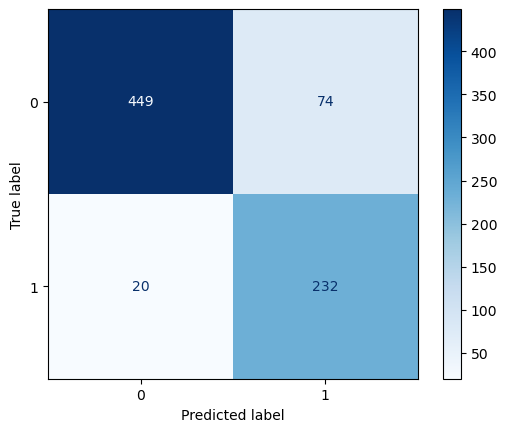

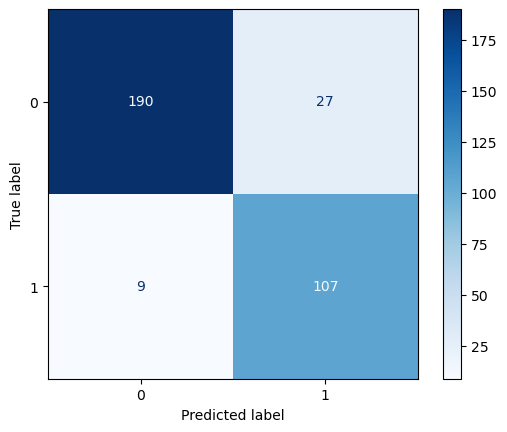

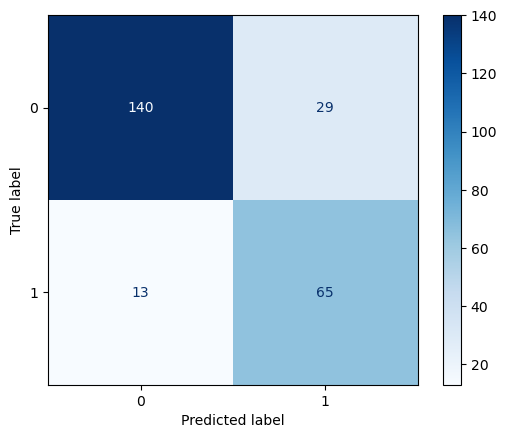

Training AUC: 0.9669, 95% CI: (0.9561, 0.9768)
Validation AUC: 0.9516, 95% CI: (0.9297, 0.9717)
Test AUC: 0.9231, 95% CI: (0.8846, 0.9538)
Train set recall: 0.9206349206349206
Validation set recall: 0.9224137931034483
Test set recall: 0.8333333333333334
Train set accuracy: 0.8787096774193548
Validation set accuracy: 0.8918918918918919
Test set accuracy: 0.8299595141700404
Train set f1: 0.8315412186379929
Validation set f1: 0.856
Test set f1: 0.7558139534883721
Best cutoff value: 0.24279854547156401


In [13]:
from sklearn.linear_model import LogisticRegression
from scipy import stats
import matplotlib.pyplot as plt

  
# 假设 data1 和 data2 已经被加载为pandas DataFrame，并且包含了特征和目标变量  
# data1['features'] 和 data1['target']  
# data2['features'] 和 data2['target']（注意：对于test集，我们通常不使用target来计算性能指标）  
  
# 逻辑回归模型训练  
model_logistic = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2', C=90, random_state=99)  

# 在训练集上训练模型
model_logistic.fit(X_train, y_train)  

#val和test集标准化
  
# 预测概率  
y_train_logistic_probs = model_logistic.predict_proba(X_train)[:, 1]  
y_val_logistic_probs = model_logistic.predict_proba(X_val)[:, 1]  
y_test_logistic_probs = model_logistic.predict_proba(X_test)[:, 1]   


# 初始化变量来存储最佳阈值和性能指标  
best_threshold = None  
best_j_index = -1  

# 遍历可能的阈值（这里使用所有不同的预测概率作为阈值）  
thresholds = np.unique(np.concatenate((y_train_logistic_probs, y_val_logistic_probs)))  
for threshold in thresholds:  
    # 计算validation集的混淆矩阵（仅用于选择最佳阈值）  
    val_predictions = (y_val_logistic_probs >= threshold).astype(int)  
    tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()  
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  
    j_index = sensitivity + specificity - 1  
      
    # 更新最佳阈值和约登指数  
    if j_index > best_j_index:  
        best_j_index = j_index  
        best_threshold_logistic = threshold

  
# 使用最佳阈值进行分类  
y_train_logistic_pred = (y_train_logistic_probs >= best_threshold_logistic).astype(int)  
y_val_logistic_pred = (y_val_logistic_probs >= best_threshold_logistic).astype(int)  
y_test_logistic_pred = (y_test_logistic_probs >= best_threshold_logistic).astype(int)  
  
# 混淆矩阵  
train_logistic_cm = confusion_matrix(y_train, y_train_logistic_pred)  
val_logistic_cm = confusion_matrix(y_val, y_val_logistic_pred)  
# 注意：对于test集，我们通常不计算真实的混淆矩阵，因为没有真实的标签（或假设我们不知道它们）  
# 但为了完整性，我们假设有标签并计算它  
test_logistic_cm = confusion_matrix(y_test, y_test_logistic_pred)   

# 绘制混淆矩阵图  
disp_train_logistic = ConfusionMatrixDisplay(confusion_matrix=train_logistic_cm)
disp_val_logistic = ConfusionMatrixDisplay(confusion_matrix=val_logistic_cm)
disp_test_logistic = ConfusionMatrixDisplay(confusion_matrix=test_logistic_cm)
  
# 召回率、准确率  
train_logistic_recall = recall_score(y_train, y_train_logistic_pred)  
train_logistic_accuracy = accuracy_score(y_train, y_train_logistic_pred)  
  
val_logistic_recall = recall_score(y_val, y_val_logistic_pred)  
val_logistic_accuracy = accuracy_score(y_val, y_val_logistic_pred)  
  
test_logistic_recall = recall_score(y_test, y_test_logistic_pred)  # 假设data2['target']是可用的  
test_logistic_accuracy = accuracy_score(y_test, y_test_logistic_pred)  # 同样假设  

# 计算F1分数  
train_logistic_f1 = f1_score(y_train, y_train_logistic_pred)  
val_logistic_f1 = f1_score(y_val, y_val_logistic_pred)  
test_logistic_f1 = f1_score(y_test, y_test_logistic_pred)

# 计算训练集AUC的95%置信区间  
def auc_ci(y_train, y_train_logistic_probs, n_bootstraps=1000, alpha=0.05):  
    bootstrapped_scores = []  
  
    # 生成n_bootstraps个bootstrap样本，并计算每个样本的AUC  
    for i in range(n_bootstraps):  
        # 从原始样本中有放回地随机抽取样本  
        indices = np.random.choice(len(y_train), len(y_train), replace=True)
        y_train_logistic_bootstrap = y_train.iloc[indices]
        y_train_logistic_probs_bootstrap = y_train_logistic_probs[indices]
    
        score_logistic = roc_auc_score(y_train_logistic_bootstrap, y_train_logistic_probs_bootstrap)  
        bootstrapped_scores.append(score_logistic)  
  
    # 计算置信区间  
    bootstrapped_scores = np.array(bootstrapped_scores)  
    lower = np.percentile(bootstrapped_scores, 100 * alpha / 2)  
    upper = np.percentile(bootstrapped_scores, 100 * (1 - alpha / 2))  
    return lower, upper  

# 计算train集的AUC及其95%CI（虽然这通常不是基于阈值的）  
train_logistic_auc = roc_auc_score(y_train, y_train_logistic_probs) 
train_logistic_auc_ci = auc_ci(y_train, y_train_logistic_probs) 

# 计算验证集AUC的95%置信区间  
def auc_ci(y_val, y_val_logistic_probs, n_bootstraps=1000, alpha=0.05):  
    bootstrapped_scores = []  
  
    # 生成n_bootstraps个bootstrap样本，并计算每个样本的AUC  
    for i in range(n_bootstraps):  
        # 从原始样本中有放回地随机抽取样本  
        indices = np.random.choice(len(y_val), len(y_val), replace=True)
        y_val_logistic_bootstrap = y_val.iloc[indices]
        y_val_logistic_probs_bootstrap = y_val_logistic_probs[indices]
    
        score_logistic = roc_auc_score(y_val_logistic_bootstrap, y_val_logistic_probs_bootstrap)  
        bootstrapped_scores.append(score_logistic)  
  
    # 计算置信区间  
    bootstrapped_scores = np.array(bootstrapped_scores)  
    lower = np.percentile(bootstrapped_scores, 100 * alpha / 2)  
    upper = np.percentile(bootstrapped_scores, 100 * (1 - alpha / 2))  
    return lower, upper 

# 计算validation集的AUC及其95%CI（虽然这通常不是基于阈值的） 
val_logistic_auc = roc_auc_score(y_val, y_val_logistic_probs)
val_logistic_auc_ci = auc_ci(y_val, y_val_logistic_probs) 


# 计算测试集AUC的95%置信区间  
def auc_ci(y_test, y_test_logistic_probs, n_bootstraps=1000, alpha=0.05):  
    bootstrapped_scores = []  
  
    # 生成n_bootstraps个bootstrap样本，并计算每个样本的AUC  
    for i in range(n_bootstraps):  
        # 从原始样本中有放回地随机抽取样本  
        indices = np.random.choice(len(y_test), len(y_test), replace=True)
        y_test_logistic_bootstrap = y_test.iloc[indices]
        y_test_logistic_probs_bootstrap = y_test_logistic_probs[indices]
        
        score_logistic = roc_auc_score(y_test_logistic_bootstrap, y_test_logistic_probs_bootstrap)  
        bootstrapped_scores.append(score_logistic)  
  
    # 计算置信区间  
    bootstrapped_scores = np.array(bootstrapped_scores)  
    lower = np.percentile(bootstrapped_scores, 100 * alpha / 2)  
    upper = np.percentile(bootstrapped_scores, 100 * (1 - alpha / 2))  
    return lower, upper

# 计算test集的AUC及其95%CI（虽然这通常不是基于阈值的） 
test_logistic_auc = roc_auc_score(y_test, y_test_logistic_probs)
test_logistic_auc_ci = auc_ci(y_test, y_test_logistic_probs) 

print("Logistic train set confusion matrix:")  
print(train_logistic_cm)  
print("Logistic validation set confusion matrix:")  
print(val_logistic_cm) 
print("Logistic test set confusion matrix:")  
print(test_logistic_cm)
disp_train_logistic.plot(cmap=plt.cm.Blues)
disp_val_logistic.plot(cmap=plt.cm.Blues)
disp_test_logistic.plot(cmap=plt.cm.Blues)

plt.show()

#输出AUC及其95%置信区间： 
print(f"Training AUC: {train_logistic_auc:.4f}, 95% CI: ({train_logistic_auc_ci[0]:.4f}, {train_logistic_auc_ci[1]:.4f})")  
print(f"Validation AUC: {val_logistic_auc:.4f}, 95% CI: ({val_logistic_auc_ci[0]:.4f}, {val_logistic_auc_ci[1]:.4f})")  
print(f"Test AUC: {test_logistic_auc:.4f}, 95% CI: ({test_logistic_auc_ci[0]:.4f}, {test_logistic_auc_ci[1]:.4f})")


print(f"Train set recall: {train_logistic_recall}")  
print(f"Validation set recall: {val_logistic_recall}") 
print(f"Test set recall: {test_logistic_recall}")

print(f"Train set accuracy: {train_logistic_accuracy}")   
print(f"Validation set accuracy: {val_logistic_accuracy}")   
print(f"Test set accuracy: {test_logistic_accuracy}")  

print(f"Train set f1: {train_logistic_f1}")  
print(f"Validation set f1: {val_logistic_f1}")  
print(f"Test set f1: {test_logistic_f1}")

print(f"Best cutoff value: {best_threshold_logistic}") 

In [14]:
import joblib
# 保存模型
joblib.dump(model_logistic , 'Logistic.pkl')

['Logistic.pkl']

In [15]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Load the model
model = joblib.load('Logistic.pkl')

# Define feature names
feature_names = ["LDH", "ALP", "Neutrophils", "DBIL", "ALB", "Fg"]

# Streamlit user interface
st.title("COVID-19 Subphenotype Classifier")

# LDH: numerical input
LDH = st.number_input("LDH:", min_value=50, max_value=4000, value=270)

# ALP: numerical input
ALP = st.number_input("ALP:", min_value=1, max_value=2000, value=80)

# Neutrophils: numerical input
Neutrophils = st.number_input("Neutrophils:", min_value=0, max_value=50, value=6)

# DBIL: numerical input
DBIL = st.number_input("DBIL:", min_value=0, max_value=100, value=5)

# ALB: numerical input
ALB = st.number_input("ALB:", min_value=0, max_value=100, value=35)

# Fg: numerical input
Fg = st.number_input("Fg:", min_value=0, max_value=50, value=3)

# Process inputs and make predictions
feature_values = [LDH, ALP, Neutrophils, DBIL, ALB, Fg]
features = np.array([feature_values])

if st.button("Predict"):
    # Predict probabilities
    predicted_proba = model.predict_proba(features)[0]
    
    # 根据预测概率的最高值来确定预测类别（但这里我们直接根据概率阈值判断）  
    high_risk_threshold = 0.24  # 24% 的阈值  
    if predicted_proba[1] > high_risk_threshold:  # 假设模型输出的第二个概率是高风险类的概率  
        predicted_class = 1  # 高风险  
    else:  
        predicted_class = 0  # 低风险


     # 显示预测结果  
    st.write(f"**Predicted Class (Based on Probability Threshold)**: {'Cluster 2' if predicted_class == 1 else 'Cluster 1'}")  
    st.write(f"**Predicted Probability of Cluster 2**: {predicted_proba[1] * 100:.1f}%")  




2024-12-20 19:52:53.790 
  command:

    streamlit run D:\download\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-20 19:52:53.790 Session state does not function when running a script without `streamlit run`
